# Loading the datasets

In [65]:
mushroom_train = read.csv("mushroom_train.csv")
mushroom_test = read.csv("mushroom_test.csv")

### Brief look at data

In [66]:
head(mushroom_train)
head(mushroom_test)

class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,weight,ring.number,ring.type,spore.print.color,population,habitat
p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m
p,x,f,y,f,f,f,c,b,h,...,p,n,p,w,23,o,l,h,y,g


cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,weight,ring.number,ring.type,spore.print.color,population,habitat
x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m
f,f,y,f,f,f,c,b,h,e,...,n,b,p,w,23,o,l,h,y,d


In [67]:
dim(mushroom_train)
dim(mushroom_test)

[1] 5686   25

[1] 2438   24

## Summarizing datasets

In [68]:
str(mushroom_train)
str(mushroom_test)

'data.frame':	5686 obs. of  25 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 2 1 2 1 2 1 1 2 2 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 3 6 3 6 6 6 3 3 6 6 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 4 3 3 3 1 3 1 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 3 9 5 3 9 10 4 5 3 4 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 1 2 2 1 2 1 1 2 1 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 8 7 6 9 4 3 6 6 3 3 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 1 1 2 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 2 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 1 5 2 1 6 4 8 10 1 4 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 2 1 1 2 1 1 2 2 2 2 ...
 $ stalk.ro

## Making datasets comparable

##### The variables 'cap.shape' and 'stalk.color.above.ring' have different number of levels in training and testing sets

In [69]:
table(mushroom_train$cap.shape)
table(mushroom_test$cap.shape)


   b    c    f    k    s    x 
 312    4 2179  590   23 2578 


   b    f    k    s    x 
 140  973  238    9 1078 

In [70]:
table(mushroom_train$stalk.color.above.ring)
table(mushroom_test$stalk.color.above.ring)


   b    c    e    g    n    o    p    w    y 
 297   24   70  430  315  121 1299 3122    8 


   b    c    e    g    n    o    p    w 
 135   12   26  146  133   71  573 1342 

##### We remove the extra levels from training datasets. This can be done only b'coz very few data will be lost in this case.

In [71]:
mushroom_train = mushroom_train[mushroom_train$cap.shape != "c",]
mushroom_train$cap.shape = factor(mushroom_train$cap.shape)

mushroom_train = mushroom_train[mushroom_train$stalk.color.above.ring != "y",]
mushroom_train$stalk.color.above.ring = factor(mushroom_train$stalk.color.above.ring)

In [72]:
dim(mushroom_train)

[1] 5676   25

# Univariate analysis

In [73]:
summary(mushroom_train$radius)
summary(mushroom_train$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    38.0   129.0   202.5   259.0  3500.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   23.00   27.00   33.01   40.00  102.00 

In [74]:
library(ggplot2) # For visualisations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


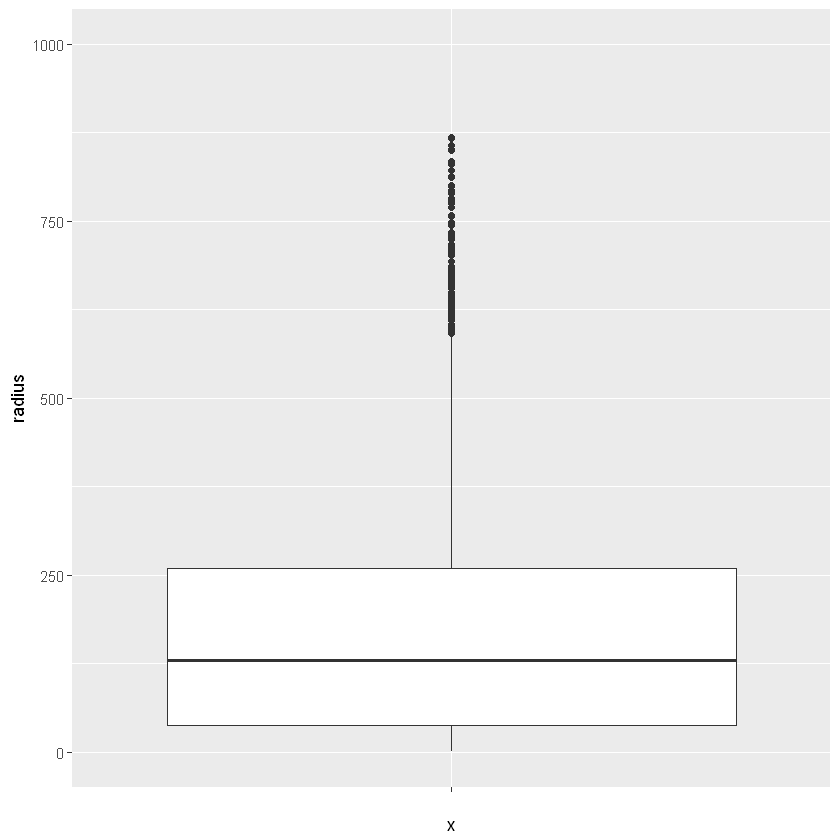

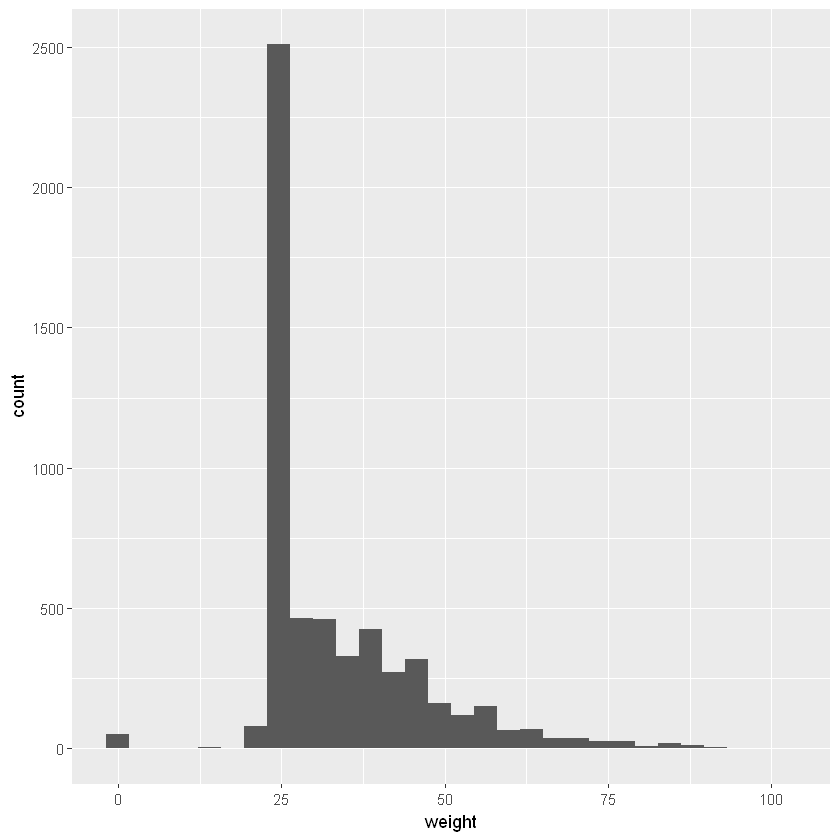

In [75]:
ggplot(mushroom_train, aes(x = "", y = radius)) + geom_boxplot() + coord_cartesian(ylim = c(0, 1000))
ggplot(mushroom_train, aes(weight)) + geom_histogram()

In [76]:
print("odor")
table(mushroom_train$odor)

print("cap.shape")
table(mushroom_train$cap.shape)

print("habitat")
table(mushroom_train$habitat)

print("stalk.root")
table(mushroom_train$stalk.root)

[1] "odor"



   a    c    f    l    m    n    p    s    y 
 270  127 1501  280   24 2477  188  411  398 

[1] "cap.shape"



   b    f    k    s    x 
 310 2177  588   23 2578 

[1] "habitat"



   d    g    l    m    p    u    w 
2227 1500  558  198  798  256  139 

[1] "stalk.root"



   ?    b    c    e    r 
1727 2663  374  780  132 

# Bivariate analysis

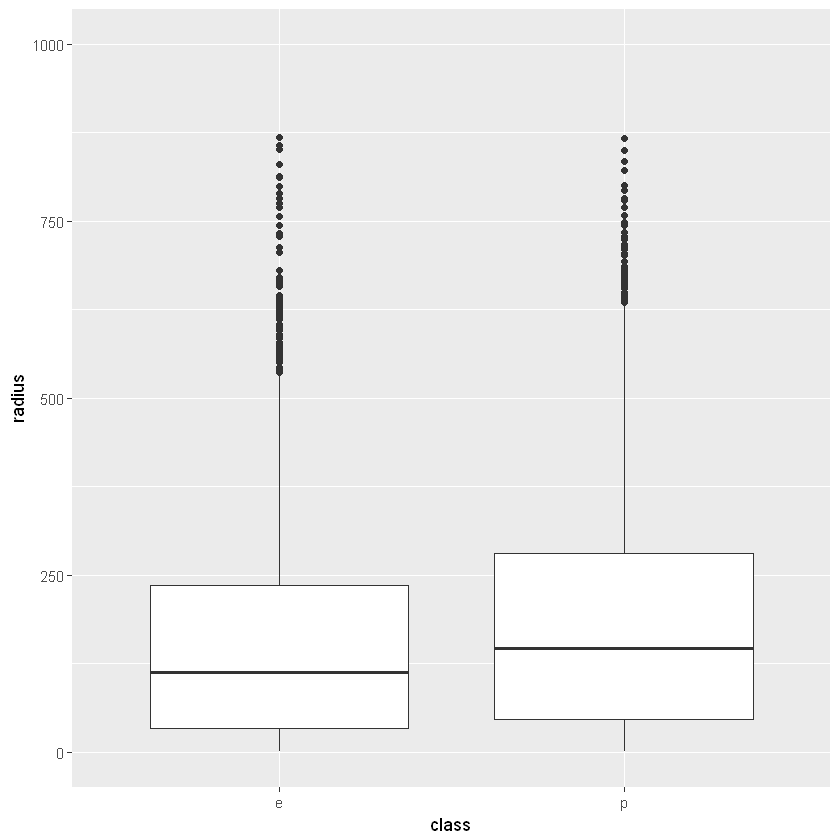

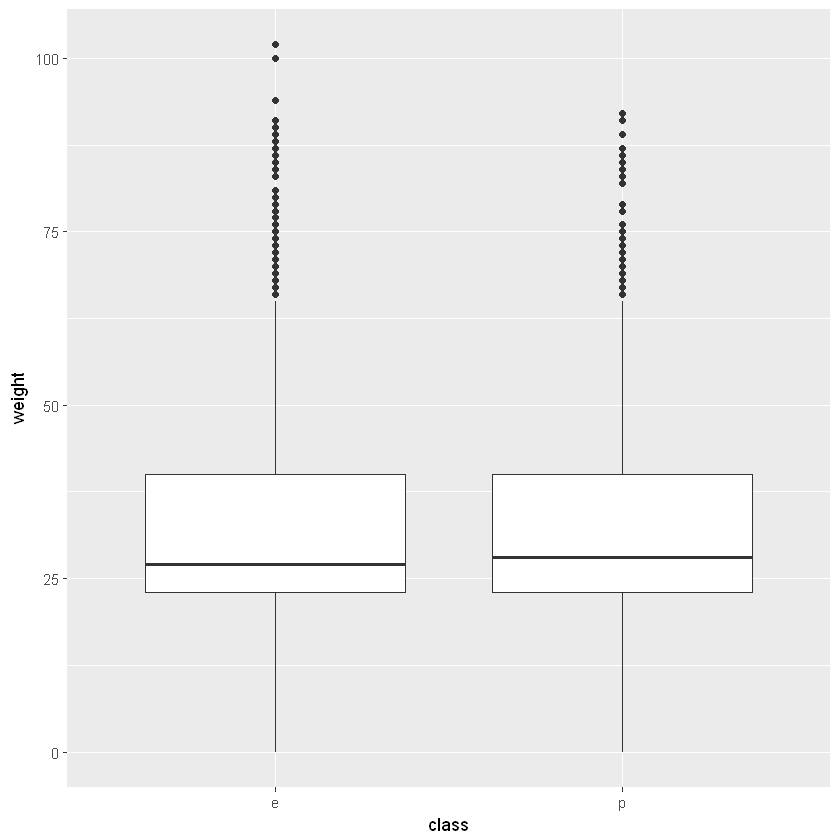

In [77]:
ggplot(mushroom_train, aes(x = class, y = radius)) + geom_boxplot() + coord_cartesian(ylim = c(0,1000))
ggplot(mushroom_train, aes(x = class, y = weight)) + geom_boxplot()

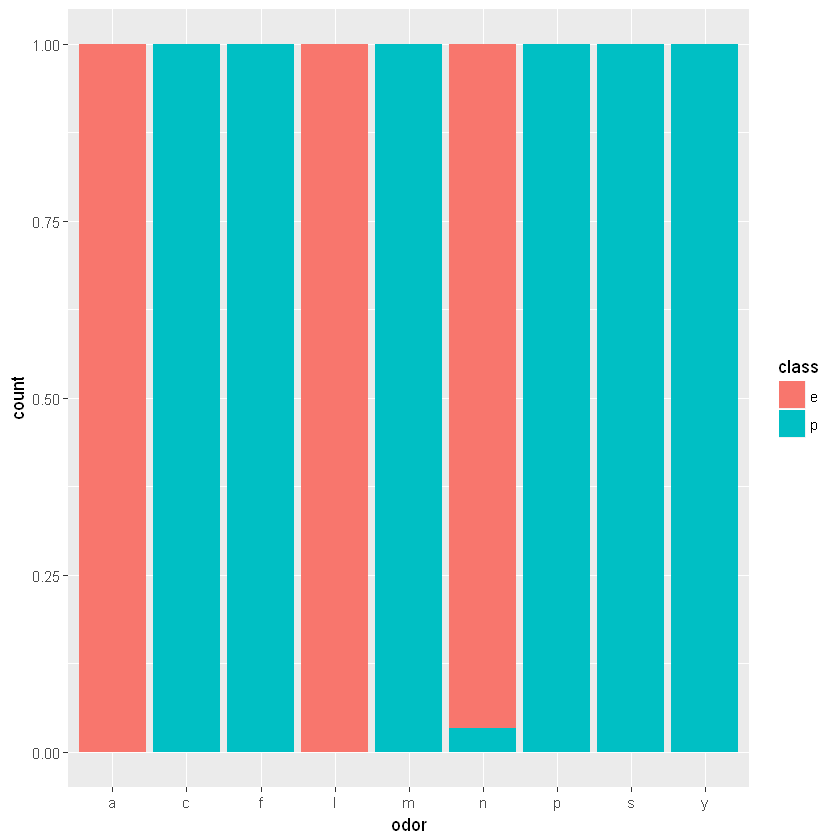

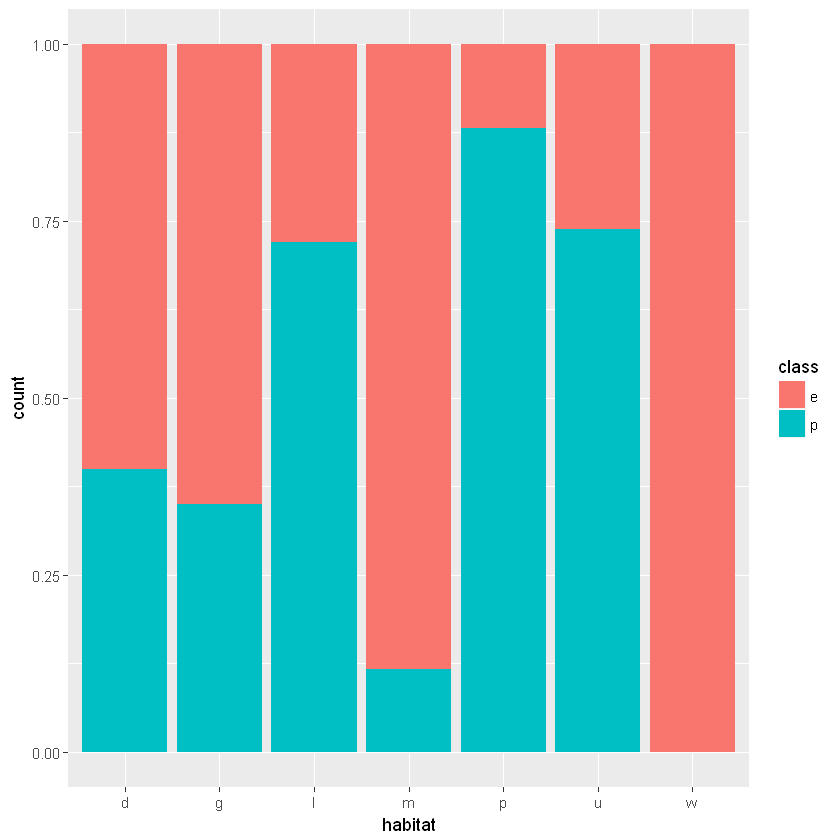

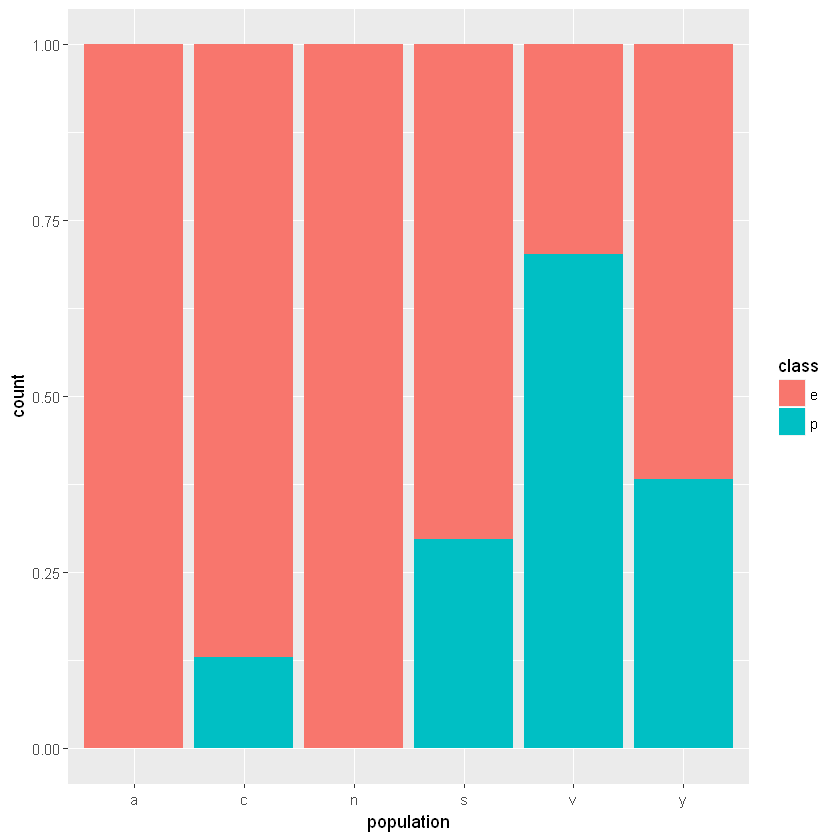

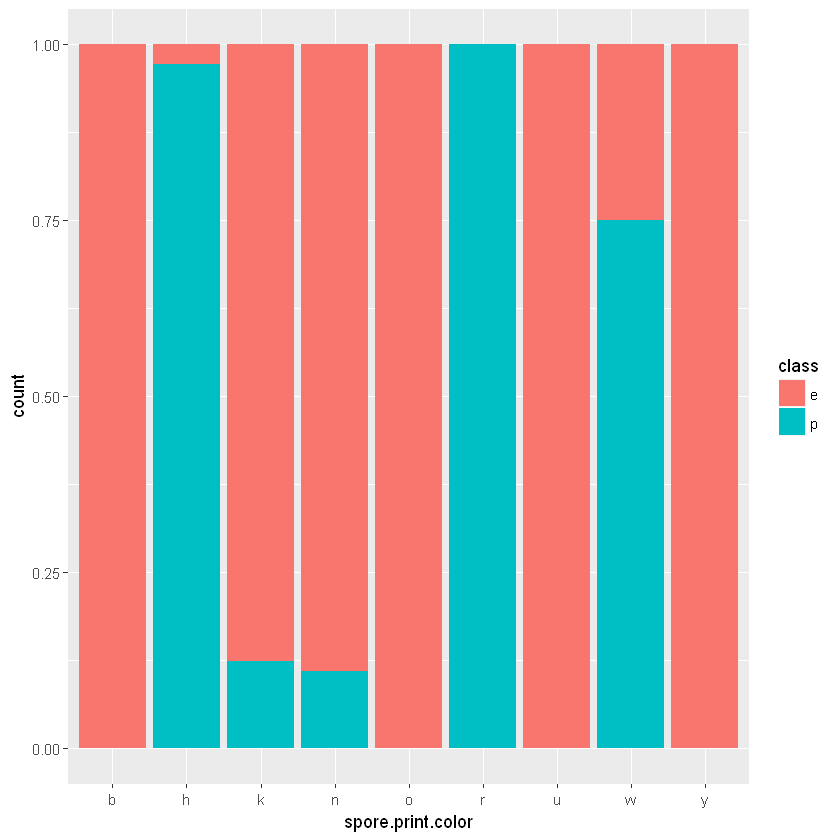

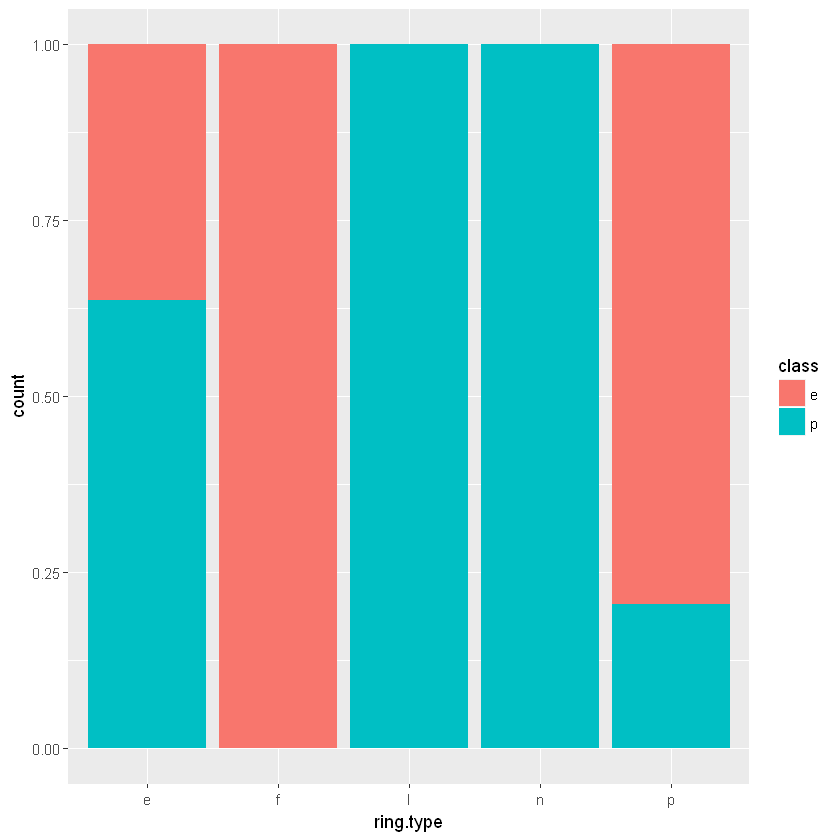

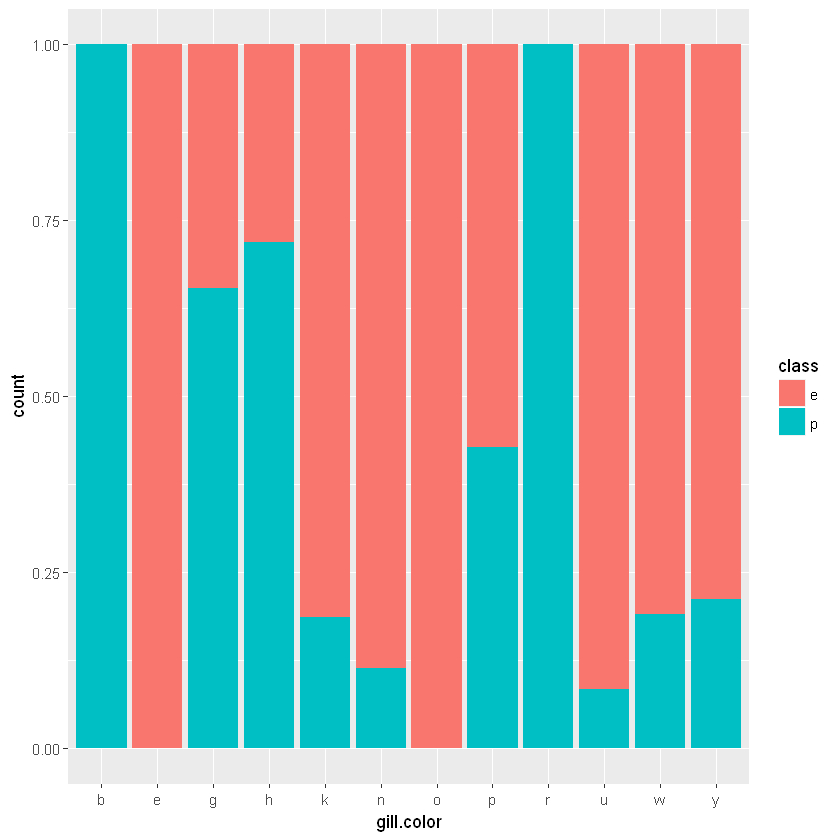

In [78]:
ggplot(mushroom_train, aes(x = odor, fill = class)) + geom_bar(position = "fill")
ggplot(mushroom_train, aes(x = habitat, fill = class)) + geom_bar(position = "fill")
ggplot(mushroom_train, aes(x = population, fill = class)) + geom_bar(position = "fill")
ggplot(mushroom_train, aes(x = spore.print.color, fill = class)) + geom_bar(position = "fill")
ggplot(mushroom_train, aes(x = ring.type, fill = class)) + geom_bar(position = "fill")
ggplot(mushroom_train, aes(x = gill.color, fill = class)) + geom_bar(position = "fill")

# Missing values

In [79]:
mushroom_train[mushroom_train == "?"] = NA
mushroom_test[mushroom_test == "?"] = NA

In [80]:
colSums(is.na(mushroom_train))
colSums(is.na(mushroom_test))

class                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                     1727 
                  radius stalk.surface.above.ring stalk.surface.below.ring 
                       0                        0                        0 
  stalk.color.above.ring   stalk.color.below.ring                veil.type 
                       0                        0                        0 
              veil.color                   weight              ring.number 
                       0                        0                        0 
               ring.type        spore.print.color               population 
                       0                        0                        0 
                 habitat 
                       0

cap.shape              cap.surface                cap.color 
                       0                        0                        0 
                 bruises                     odor          gill.attachment 
                       0                        0                        0 
            gill.spacing                gill.size               gill.color 
                       0                        0                        0 
             stalk.shape               stalk.root                   radius 
                       0                      753                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring                veil.type               veil.color 
                       0                        0                        0 
                  weight              ring.number                ring.type 
                       0                        0                        0 
       spore.print.color               population                  habitat 
                       0                        0                        0

# Predicting missing values
#### Since lots of values are missing, we can't simply ignore them or replace them with mean. Instead, the missing values have been predicted using other variables which are expected to be most related to stalk.root

In [81]:
imputer = subset(mushroom_train, mushroom_train$stalk.root != "NA")

In [82]:
dim(imputer)

[1] 3949   25

#### Using decision tree to make predictions

In [83]:
library(rpart) # Library used for classification and regression trees

In [84]:
tree_imputer = rpart(stalk.root ~ habitat + population + ring.type + odor + 
                     cap.shape + stalk.surface.below.ring + stalk.surface.above.ring, data = imputer, method = "class")

In [85]:
tree_pred = predict(tree_imputer, newdata = mushroom_train, type = "class")

In [86]:
mushroom_train$stalk.pred = tree_pred

In [87]:
dim(mushroom_train)

[1] 5676   26

In [88]:
tree_pred = predict(tree_imputer, newdata = mushroom_test, type = "class")

In [89]:
mushroom_test$stalk.pred = tree_pred

In [90]:
dim(mushroom_test)

[1] 2438   25

#### Replacing missing values

In [91]:
for(i in seq(1:5676)){
  if(is.na(mushroom_train$stalk.root[i])){
    mushroom_train$stalk.root[i] = mushroom_train$stalk.pred[i]
  }
}

for(i in seq(1:2438)){
  if(is.na(mushroom_test$stalk.root[i])){
    mushroom_test$stalk.root[i] = mushroom_test$stalk.pred[i]
  }
}

In [92]:
colSums(is.na(mushroom_train))
colSums(is.na(mushroom_test))

class                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                        0 
                  radius stalk.surface.above.ring stalk.surface.below.ring 
                       0                        0                        0 
  stalk.color.above.ring   stalk.color.below.ring                veil.type 
                       0                        0                        0 
              veil.color                   weight              ring.number 
                       0                        0                        0 
               ring.type        spore.print.color               population 
                       0                        0                        0 
                 habitat               stalk.pred 
                       0                        0

cap.shape              cap.surface                cap.color 
                       0                        0                        0 
                 bruises                     odor          gill.attachment 
                       0                        0                        0 
            gill.spacing                gill.size               gill.color 
                       0                        0                        0 
             stalk.shape               stalk.root                   radius 
                       0                        0                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring                veil.type               veil.color 
                       0                        0                        0 
                  weight              ring.number                ring.type 
                       0                        0                        0 
       spore.print.color               population                  habitat 
                       0                        0                        0 
              stalk.pred 
                       0

# Baseline model

#### In bivariate analysis, we noted that 'odor' is a deciding factor in determining the 'class'. Hence we'll build a simple model (decision tree) as our baseline to compare our other models.

In [93]:
library(rpart)
library(rpart.plot) # Used for visualisation of trees

#### Dividing mushroom_train furthur into training and testing set to build and analyse our model

In [94]:
library(caTools) # Used to properly divide traing and testing sets

In [95]:
split = sample.split(mushroom_train$class, SplitRatio = 0.75)

In [96]:
train = subset(mushroom_train, split == T)

In [97]:
test = subset(mushroom_train, split == F)

#### Training the model

In [98]:
baseline = rpart(class ~ odor, data = train, method = "class")

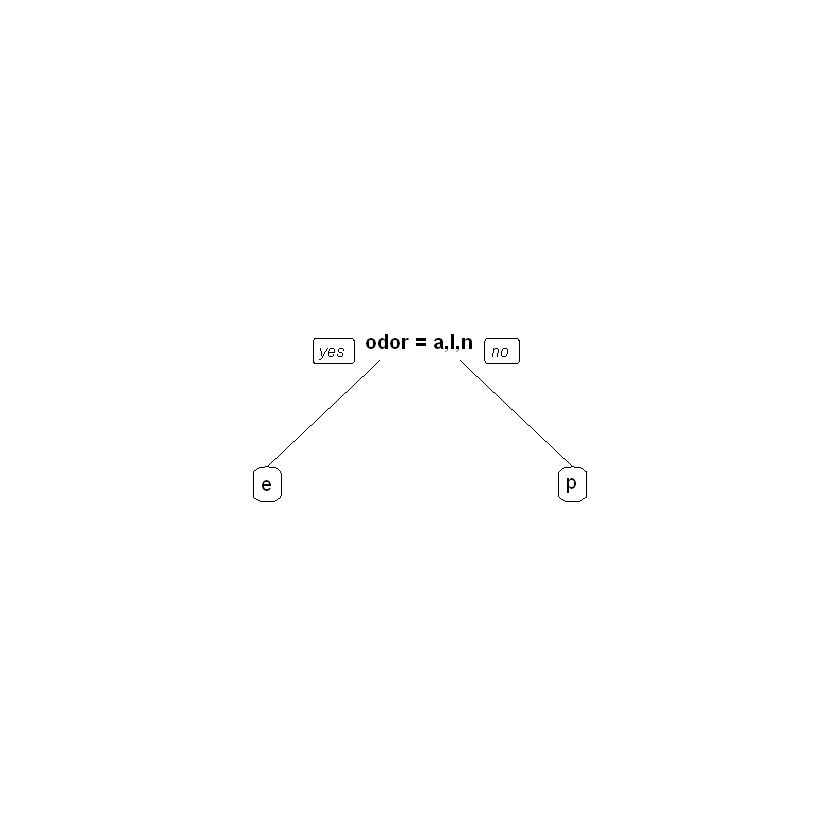

In [99]:
prp(baseline)

In [100]:
baseline_pred = predict(baseline, newdata = test, type = "class")

In [101]:
table(test$class, baseline_pred)

   baseline_pred
      e   p
  e 736   0
  p  20 663

In [102]:
base_accuracy = (736+663)/(736+663+20)
base_accuracy

[1] 0.9859056

#### Even though the baseline model seems quite impressive, we can still improve the accuracy by using other relevant data

# Building the model

##  Feature selection: Forward selection

### By building decision trees with one predictor at a time, we find that some predictors were single-handedly able to produce quite accurate models. 10 highest accuracy producing predictors are odor, habitat, population, spore.print.color, ring.type, stalk.color.below.ring, stalk.surface.below.ring, gill.color, gill.size and stalk.root. Highest being 'odor' (98.5%).

### Hence, we make use of random forest using all these 10 variables

In [103]:
library(randomForest)

In [104]:
random_mushroom = randomForest(class ~ odor + habitat + population + spore.print.color + ring.type + 
                               stalk.color.below.ring + stalk.surface.below.ring + gill.color + 
                               gill.size + stalk.root, data = train)

In [105]:
pred_test = predict(random_mushroom, newdata = test)

In [106]:
table(test$class, pred_test)

   pred_test
      e   p
  e 736   0
  p   0 683

In [107]:
mushroom_accu = (736+683)/(736+683)
mushroom_accu

[1] 1

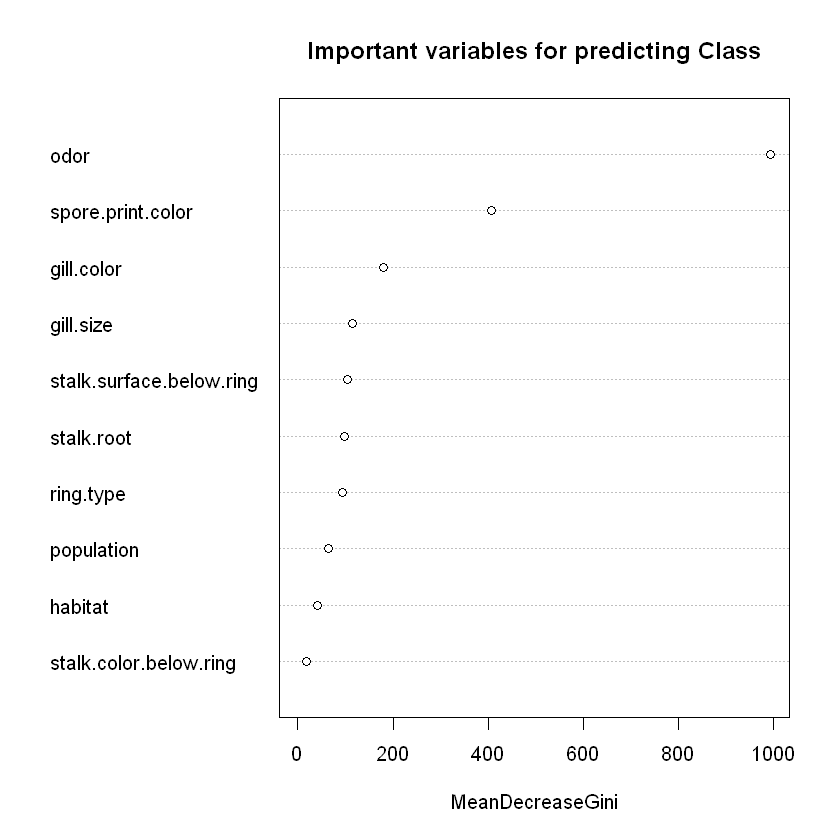

In [108]:
varImpPlot(random_mushroom, main="Important variables for predicting Class")

In [109]:
random_mushroom$importance

,MeanDecreaseGini
odor,994.13559
habitat,41.89452
population,63.38612
spore.print.color,407.66277
ring.type,92.69857
stalk.color.below.ring,18.51706
stalk.surface.below.ring,104.92764
gill.color,179.79592
gill.size,114.20952
stalk.root,98.80146


## Feature selection: Backward selection

### Even though our model is showing 100% accuracy, there are three variables which don't seem to contribute much to our model.

### We create a final model using the best 7 remaining variables and using cross-validation

In [110]:
library(caret) # Used here for cross-validation

In [111]:
control = trainControl(method="repeatedcv", number=4, repeats=3)

In [112]:
Final_model = train(class ~ odor + spore.print.color + ring.type + stalk.surface.below.ring + gill.color + 
                               gill.size + stalk.root, data=train, method="rf", preProcess="scale", trControl=control)

In [113]:
Final_model

Random Forest 

4257 samples
   7 predictor
   2 classes: 'e', 'p' 

Pre-processing: scaled (39) 
Resampling: Cross-Validated (4 fold, repeated 3 times) 
Summary of sample sizes: 3193, 3192, 3193, 3193, 3193, 3193, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9886457  0.9772417
  20    0.9998434  0.9996862
  39    1.0000000  1.0000000

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 39.

In [114]:
pred_test = predict(Final_model, newdata = test)

In [115]:
table(test$class, pred_test)

   pred_test
      e   p
  e 736   0
  p   0 683

In [116]:
accuracy = (736+683)/(736+683)
accuracy

[1] 1

# Making predictions

In [117]:
Final_pred = predict(Final_model, newdata = mushroom_test)

In [118]:
mushroom_test$Predictions = Final_pred

In [119]:
dim(mushroom_test)

[1] 2438   26

In [120]:
head(mushroom_test$Predictions, n = 15)

[1] e p e p e p p e e p e e p p e
Levels: e p

In [121]:
mushroom_predictions = data.frame(Final_pred)

In [122]:
str(mushroom_predictions)

'data.frame':	2438 obs. of  1 variable:
 $ Final_pred: Factor w/ 2 levels "e","p": 1 2 1 2 1 2 2 1 1 2 ...


In [123]:
write.csv(mushroom_predictions, 'mushroom_predictions.csv')